# Aprendizaje Automatico I - Gravi Fiorino - Gauto

Importamos librerias

In [500]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

3. Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada
una de las variables involucradas en el problema detallando características,
comportamiento y rango de variación.
Debe incluir:
    * Análisis y decisión sobre datos faltantes.
    * Visualización de datos (por ejemplo histogramas, scatterplots entre variables,
    diagramas de caja)
    * ¿Está balanceado el dataset? ¿Por qué cree que hacemos esta pregunta?
    * Codificación de variables categóricas (si se van a utilizar para predicción).
    * Matriz de correlación de variables.
    * Estandarización de datos.

    * Validación cruzada train - test. Realizar una división del conjunto de datos en
    conjuntos de entrenamiento y prueba (y si se quiere, se puede incluir
    validación, que luego será útil)
    * en el MOMENTO donde usted lo crea adecuado.

Leemos archivo

In [501]:
archivo = pd.read_csv("weatherAUS.csv")
archivo.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,72728.184393,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,41990.722236,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [502]:
archivo.dtypes

Unnamed: 0            int64
Date                 object
Location             object
MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustDir          object
WindGustSpeed       float64
WindDir9am           object
WindDir3pm           object
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainToday            object
RainTomorrow         object
RainfallTomorrow    float64
dtype: object

# Análisis Exploratorio

In [503]:
archivo.head(3)

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0


Dropeamos columna "Unnamed: 0"

In [504]:
archivo = archivo.drop("Unnamed: 0", axis = "columns")

### Eliminacion de ciudades

Nos quedamos con las ciudades de interes:  
* Adelaide,  
* Canberra, 
* Cobar, 
* Dartmoor, 
* Melbourne,
* MelbourneAirport, 
* MountGambier, 
* Sydney, 
* SydneyAirport.

In [505]:
ciudadesDeInteres = ["Adelaide","Canberra","Cobar", "Dartmoor","Melbourne","MelbourneAirport", "MountGambier", "Sydney", "SydneyAirpor"]

In [506]:
df = archivo[archivo['Location'].isin(ciudadesDeInteres)]
#df.head()

In [507]:
df["Location"].unique()

array(['Cobar', 'Sydney', 'Canberra', 'MelbourneAirport', 'Melbourne',
       'Dartmoor', 'Adelaide', 'MountGambier'], dtype=object)

Nos parecio imperativo conocer la estación del año en la que nos encontramos. Por lo tanto, construimos una funcion para ello

In [508]:
df['Date'] = pd.to_datetime(df['Date'])

def get_season(month):
    if month in [12, 1, 2]:  # Diciembre, Enero, Febrero -> Verano
        return 'Verano'
    elif month in [3, 4, 5]:  # Marzo, Abril, Mayo -> Otoño
        return 'Otoño'
    elif month in [6, 7, 8]:  # Junio, Julio, Agosto -> Invierno
        return 'Invierno'
    else:  # Septiembre, Octubre, Noviembre -> Primavera
        return 'Primavera'
df['Season'] = df['Date'].dt.month.map(get_season)

C:\Users\mateo\AppData\Local\Temp\ipykernel_12988\426852557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\mateo\AppData\Local\Temp\ipykernel_12988\426852557.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Date'].dt.month.map(get_season)


# Split Train y Test

In [509]:
# Codificación de variables categóricas
columns = ['Location', 'WindGustDir', 'RainToday', 'WindDir9am','WindDir3pm']
df_encoded = pd.get_dummies(df, columns=columns, drop_first=True)
df_encoded

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
6047,2009-01-01,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,...,False,False,False,False,False,False,True,False,False,False
6048,2009-01-02,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,...,False,False,False,False,True,False,False,False,False,False
6049,2009-01-03,15.5,34.1,0.0,12.6,13.3,30.0,NaN,7.0,NaN,...,False,False,False,False,False,False,False,False,False,False
6050,2009-01-04,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,...,True,False,False,False,False,False,False,False,False,False
6051,2009-01-05,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,2017-06-20,6.2,16.3,0.0,NaN,NaN,41.0,24.0,22.0,89.0,...,False,True,False,False,False,False,False,False,False,False
102516,2017-06-21,8.7,13.2,2.0,NaN,NaN,20.0,0.0,11.0,98.0,...,False,False,False,True,False,False,False,False,False,False
102517,2017-06-22,7.0,15.7,0.0,NaN,NaN,31.0,13.0,15.0,92.0,...,True,False,False,False,False,False,False,False,False,False
102518,2017-06-23,5.4,16.2,0.0,NaN,NaN,37.0,24.0,24.0,90.0,...,False,False,False,False,False,False,False,True,False,False


In [510]:
# División del conjunto de datos
X = df_encoded.drop(['Date', 'RainTomorrow', 'RainfallTomorrow'], axis=1)
y1 = df_encoded['RainTomorrow']
y2 = df_encoded['RainfallTomorrow']

In [511]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Boxplots

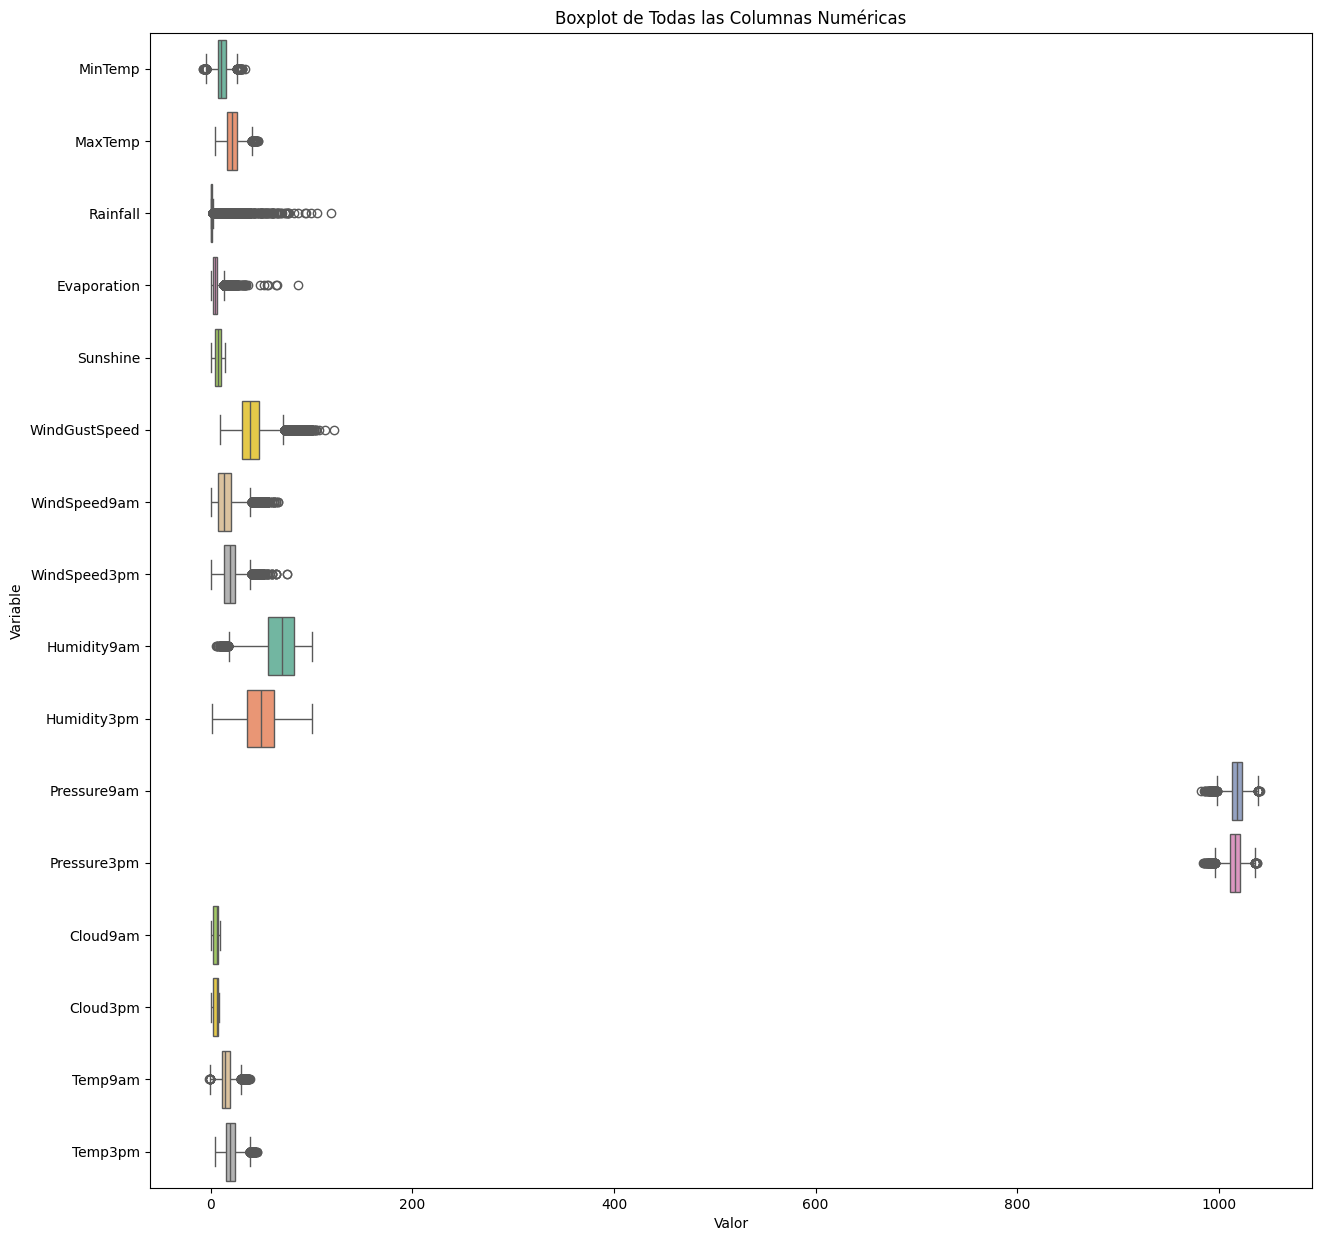

In [512]:
# Seleccionar solo las columnas numéricas
numeric_columns = X_train.select_dtypes(include=['float64', 'int64'])

# Crear un boxplot para cada columna numérica
plt.figure(figsize=(15, 15))
sns.boxplot(data=numeric_columns, orient='h', palette='Set2')

# Añadir título y etiquetas
plt.title('Boxplot de Todas las Columnas Numéricas')
plt.xlabel('Valor')
plt.ylabel('Variable')

# Mostrar el boxplot
plt.show()

# Nulos

In [513]:
X_train.isnull().sum()

MinTemp            463
MaxTemp            452
Rainfall           794
Evaporation       3429
Sunshine          5353
                  ... 
WindDir3pm_SSW       0
WindDir3pm_SW        0
WindDir3pm_W         0
WindDir3pm_WNW       0
WindDir3pm_WSW       0
Length: 70, dtype: int64

In [514]:
#df['WindGustDir'].head(4)
#df['WindGustSpeed'].head(4)
#df['WindDir9am'].head(4)
#df['WindDir3pm'].head(4)
#df['RainToday'].head(4)
#df['RainTomorrow'].head(4)


### Nulos numéricos

Valores nulos de Mediana, son aquellos valores que decidimos completar con esta medida, por ejemplo las temperaturas minimas y maximas, los valores de Rainfall y Evaporation, la presion a las 3 y 9, nubosidad y temperatura a 3 y 9

In [515]:
X_train.shape

(20180, 70)

In [516]:
"""
Esta funcion la creamos para poder setear las medianas por locación y estación.
Principalmente creímos que esto es lo apropiado debido a que aspectos como la temperatura,
lluvia, presión, etc., son sensibles tanto a la región como a la estación en la que se miden.
Nos pareció apropiado distinguir las medianas de según cada región y estación del año.
"""

def nulos_mediana(data, col):
    mediana = data.groupby(['Season'])[col].transform('median')
    data.loc[data[col].isnull(), col] = mediana

In [517]:
# Min temp
nulos_mediana(X_train,'MinTemp')
nulos_mediana(X_test,'MinTemp')

# Max temp
nulos_mediana(X_train,'MaxTemp')
nulos_mediana(X_test,'MaxTemp')

# Rainfall
nulos_mediana(X_train,'Rainfall')
nulos_mediana(X_test,'Rainfall')

# Evaporation
nulos_mediana(X_train, 'Evaporation')
nulos_mediana(X_test, 'Evaporation')

# Pressure9am
nulos_mediana(X_train,'Pressure9am')
nulos_mediana(X_test,'Pressure9am')

# Pressure3pm
nulos_mediana(X_train,'Pressure3pm')
nulos_mediana(X_test,'Pressure3pm')

# Temp9am , 3pm
nulos_mediana(X_train,'Temp9am')
nulos_mediana(X_test,'Temp9am')
              
nulos_mediana(X_train,'Temp3pm')
nulos_mediana(X_test,'Temp3pm')

# WindGustSpeed
nulos_mediana(X_train,'WindGustSpeed')
nulos_mediana(X_test,'WindGustSpeed')

# WindSpeed
nulos_mediana(X_train,'WindSpeed9am')
nulos_mediana(X_test,'WindSpeed9am')

nulos_mediana(X_train,'WindSpeed3pm')
nulos_mediana(X_test,'WindSpeed9am')

Valores nulos que decidimos llenar con la media, debido a sus pocos casos atipicos. Sunshine, Humidity, Cloud

In [518]:
def nulos_media(data,col):
    media = data.groupby(['Season'])[col].transform('mean')
    data[col].fillna(media, inplace=True)

In [519]:
# Sunshine
nulos_media(X_train,'Sunshine')
nulos_media(X_test,'Sunshine')

# Humidity 9am
nulos_media(X_train,'Humidity9am')
nulos_media(X_test,'Humidity9am')

nulos_media(X_train,'Humidity3pm')
nulos_media(X_test,'Humidity3pm')

# Cloud
nulos_media(X_train, 'Cloud9am')
nulos_media(X_test, 'Cloud9am')

nulos_media(X_train,'Cloud3pm')
nulos_media(X_test,'Cloud3pm')


In [520]:
X_test = X_test.dropna() # Borramos 52 filas que no pudimos saber por que no se imputaban.

## Eliminamos Season

Comprobamos que no hay mas nulos.

In [530]:
X_train = pd.get_dummies(X_train, columns=['Season'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Season'], drop_first=True)

In [531]:
X_train.isnull().sum()
#X_test.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
                   ..
WindDir3pm_WNW      0
WindDir3pm_WSW      0
Season_Otoño        0
Season_Primavera    0
Season_Verano       0
Length: 72, dtype: int64

## Visualización

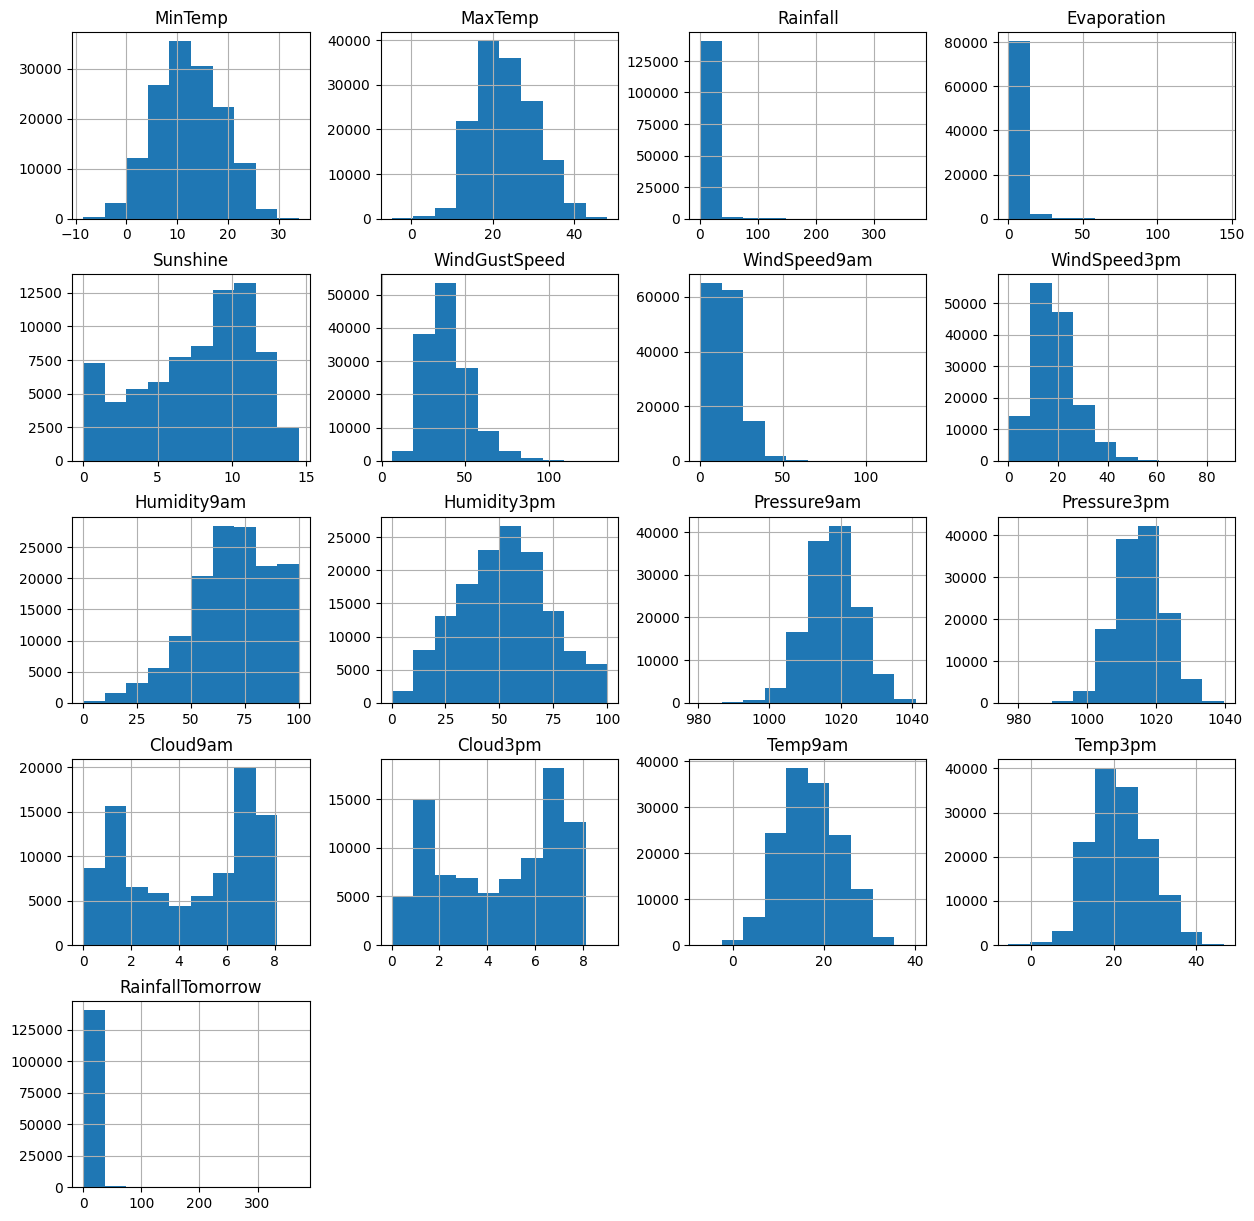

In [ ]:
archivo.hist(figsize=(15, 15))
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25225 entries, 6047 to 102519
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              25225 non-null  datetime64[ns]
 1   Location          25225 non-null  object        
 2   MinTemp           24656 non-null  float64       
 3   MaxTemp           24667 non-null  float64       
 4   Rainfall          24243 non-null  float64       
 5   Evaporation       20918 non-null  float64       
 6   Sunshine          18528 non-null  float64       
 7   WindGustDir       23631 non-null  object        
 8   WindGustSpeed     23634 non-null  float64       
 9   WindDir9am        23585 non-null  object        
 10  WindDir3pm        24792 non-null  object        
 11  WindSpeed9am      24870 non-null  float64       
 12  WindSpeed3pm      24886 non-null  float64       
 13  Humidity9am       24287 non-null  float64       
 14  Humidity3pm       24339

### Heatmap

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20180 entries, 69132 to 100949
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MinTemp                    20180 non-null  float64
 1   MaxTemp                    20180 non-null  float64
 2   Rainfall                   20180 non-null  float64
 3   Evaporation                20180 non-null  float64
 4   Sunshine                   20180 non-null  float64
 5   WindGustSpeed              20180 non-null  float64
 6   WindDir9am                 20180 non-null  object 
 7   WindDir3pm                 20180 non-null  object 
 8   WindSpeed9am               20180 non-null  float64
 9   WindSpeed3pm               20180 non-null  float64
 10  Humidity9am                20180 non-null  float64
 11  Humidity3pm                20180 non-null  float64
 12  Pressure9am                20180 non-null  float64
 13  Pressure3pm                20180 non-null  flo

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25225 entries, 6047 to 102519
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              25225 non-null  datetime64[ns]
 1   Location          25225 non-null  object        
 2   MinTemp           24656 non-null  float64       
 3   MaxTemp           24667 non-null  float64       
 4   Rainfall          24243 non-null  float64       
 5   Evaporation       20918 non-null  float64       
 6   Sunshine          18528 non-null  float64       
 7   WindGustDir       23631 non-null  object        
 8   WindGustSpeed     23634 non-null  float64       
 9   WindDir9am        23585 non-null  object        
 10  WindDir3pm        24792 non-null  object        
 11  WindSpeed9am      24870 non-null  float64       
 12  WindSpeed3pm      24886 non-null  float64       
 13  Humidity9am       24287 non-null  float64       
 14  Humidity3pm       24339

In [529]:
corr = df[]

ValueError: could not convert string to float: 'Cobar'

In [528]:
#Heatmap de variables numericas

sns.heatmap(corr, annot = True)
plt.show()

TypeError: float() argument must be a string or a real number, not 'Timestamp'

# Regresión Lineal

## Preprocesado: variables categoricas

In [ ]:
df_lr = df.drop(columns=['Date'])
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25225 entries, 6047 to 102519
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          25225 non-null  object 
 1   MinTemp           24656 non-null  float64
 2   MaxTemp           24667 non-null  float64
 3   Rainfall          24243 non-null  float64
 4   Evaporation       20918 non-null  float64
 5   Sunshine          18528 non-null  float64
 6   WindGustDir       23631 non-null  object 
 7   WindGustSpeed     23634 non-null  float64
 8   WindDir9am        23585 non-null  object 
 9   WindDir3pm        24792 non-null  object 
 10  WindSpeed9am      24870 non-null  float64
 11  WindSpeed3pm      24886 non-null  float64
 12  Humidity9am       24287 non-null  float64
 13  Humidity3pm       24339 non-null  float64
 14  Pressure9am       24394 non-null  float64
 15  Pressure3pm       24399 non-null  float64
 16  Cloud9am          15862 non-null  float64

Por la naturaleza del one hot encoding decidimos eliminar la dummy de Sydney.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

### Location

In [ ]:
encoder = OneHotEncoder()
one_hot_encoder = encoder.fit_transform(df[['Location']])
one_hot_df = pd.DataFrame(one_hot_encoder.toarray(), columns = encoder.categories_[0])
one_hot_df

,Adelaide,Canberra,Cobar,Dartmoor,Melbourne,MelbourneAirport,MountGambier,Sydney
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
25220,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25221,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25222,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25223,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_lr_index = df_lr.reset_index(drop = True)

In [ ]:
df_concat = pd.concat([df_lr_index, one_hot_df],axis=1)
df_concat = df_concat.drop(columns=['Sydney'])
df_concat

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,RainfallTomorrow,Season,Adelaide,Canberra,Cobar,Dartmoor,Melbourne,MelbourneAirport,MountGambier
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,No,0.0,Verano,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,No,0.0,Verano,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,...,No,0.0,Verano,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,No,0.0,Verano,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,No,0.0,Verano,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25220,MountGambier,6.2,16.3,0.0,NaN,NaN,N,41.0,N,NW,...,Yes,2.0,Invierno,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25221,MountGambier,8.7,13.2,2.0,NaN,NaN,S,20.0,NaN,SE,...,No,0.0,Invierno,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25222,MountGambier,7.0,15.7,0.0,NaN,NaN,N,31.0,N,NNW,...,No,0.0,Invierno,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25223,MountGambier,5.4,16.2,0.0,NaN,NaN,N,37.0,NNW,W,...,Yes,2.2,Invierno,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### WindGustDir

In [ ]:
encoder = OneHotEncoder()
one_hot_encoder = encoder.fit_transform(df[['WindGustDir']])
one_hot_df = pd.DataFrame(one_hot_encoder.toarray(), columns = encoder.categories_[0])
one_hot_df

,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25220,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25223,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['WindGustDir'].unique()

array(['SSW', 'S', 'SE', 'NNE', 'WNW', 'N', 'ENE', 'NE', 'E', 'SW', 'W',
       'WSW', 'NNW', 'ESE', 'SSE', 'NW', nan], dtype=object)

De igual manera que con la variable anterior, eliminamos una columna, en este caso WSW.

In [ ]:
df_concat2 = pd.concat([df_concat, one_hot_df],axis=1)
df_concat2 = df_concat2.drop(columns=['WSW'],axis=1)
df_concat2

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,NaN
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25220,MountGambier,6.2,16.3,0.0,NaN,NaN,N,41.0,N,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25221,MountGambier,8.7,13.2,2.0,NaN,NaN,S,20.0,NaN,SE,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25222,MountGambier,7.0,15.7,0.0,NaN,NaN,N,31.0,N,NNW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25223,MountGambier,5.4,16.2,0.0,NaN,NaN,N,37.0,NNW,W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### WindDir9am        

In [ ]:
encoder = OneHotEncoder()
one_hot_encoder = encoder.fit_transform(df[['WindDir9am']])
one_hot_df = pd.DataFrame(one_hot_encoder.toarray(), columns = encoder.categories_[0])
one_hot_df

,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25220,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25223,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_concat3 = pd.concat([df_concat2, one_hot_df],axis=1)
df_concat3 = df_concat3.drop(columns=['WSW'],axis=1)
df_concat3

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,NaN
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25220,MountGambier,6.2,16.3,0.0,NaN,NaN,N,41.0,N,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25221,MountGambier,8.7,13.2,2.0,NaN,NaN,S,20.0,NaN,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25222,MountGambier,7.0,15.7,0.0,NaN,NaN,N,31.0,N,NNW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25223,MountGambier,5.4,16.2,0.0,NaN,NaN,N,37.0,NNW,W,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Continuamos con la regresion

In [ ]:
df_concat3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25225 entries, 0 to 25224
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          25225 non-null  object 
 1   MinTemp           24656 non-null  float64
 2   MaxTemp           24667 non-null  float64
 3   Rainfall          24243 non-null  float64
 4   Evaporation       20918 non-null  float64
 5   Sunshine          18528 non-null  float64
 6   WindGustDir       23631 non-null  object 
 7   WindGustSpeed     23634 non-null  float64
 8   WindDir9am        23585 non-null  object 
 9   WindDir3pm        24792 non-null  object 
 10  WindSpeed9am      24870 non-null  float64
 11  WindSpeed3pm      24886 non-null  float64
 12  Humidity9am       24287 non-null  float64
 13  Humidity3pm       24339 non-null  float64
 14  Pressure9am       24394 non-null  float64
 15  Pressure3pm       24399 non-null  float64
 16  Cloud9am          15862 non-null  float6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25225 entries, 6047 to 102519
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              25225 non-null  datetime64[ns]
 1   Location          25225 non-null  object        
 2   MinTemp           24656 non-null  float64       
 3   MaxTemp           24667 non-null  float64       
 4   Rainfall          24243 non-null  float64       
 5   Evaporation       20918 non-null  float64       
 6   Sunshine          18528 non-null  float64       
 7   WindGustDir       23631 non-null  object        
 8   WindGustSpeed     23634 non-null  float64       
 9   WindDir9am        23585 non-null  object        
 10  WindDir3pm        24792 non-null  object        
 11  WindSpeed9am      24870 non-null  float64       
 12  WindSpeed3pm      24886 non-null  float64       
 13  Humidity9am       24287 non-null  float64       
 14  Humidity3pm       24339

In [ ]:
df.RainfallTomorrow

6047      0.0
6048      0.0
6049      0.0
6050      0.0
6051      0.0
         ... 
102515    2.0
102516    0.0
102517    0.0
102518    2.2
102519    0.6
Name: RainfallTomorrow, Length: 25225, dtype: float64

In [ ]:
df_prueba_para_regresion = df[['MinTemp','Rainfall','WindSpeed3pm','RainfallTomorrow']]

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(df_prueba_para_regresion, df_prueba_para_regresion['RainfallTomorrow'], test_size=0.2, random_state=42)


Funcion de regresión

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train2, y_train2)

#lr.predict() #para predecir

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
error = y_test2 - lr.predict(x_test2)
error

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
lr.score(x_test2, y_test2) #Muestra que tanto se explica la dependiente

1.0

# Funciones de Gradiente

## Gradiente batch

In [ ]:
import numpy as np

In [ ]:
def gradient_batch(x_train, y_train, x_test, y_test, lr = 0.01, epochs = 100):

    n = x_train.shape[0]
    m = x_train.shape[1]

    n_test = x_test.shape[0]

    #Agregar columnas de 0's
    x_train = np.hstack((np.ones(n,1)),x_train)
    x_test = np.hstack((np.ones(n_test,1)),x_test)

    W = np.random.randn(m+1).reshape(-1,1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        #Prediccion para cada punto
        prediction_train = np.matmul(x_train, W)

        error_train = y_train - prediction_train
        train_mse = np.mean(error_train**2)
        train_errors.append(train_mse) #agrego todos los errores de cada iteracion para despues graficarlos

        prediction_test = np.matmul(x_test, W)
        error_test = y_test - prediction_test
        test_mse = np.mean(error_test**2)
        test_errors.append(test_mse)

        #Calculo del gradiente
        suma_gradiente = np.sum(error_train * x_train, axis=0) #?? no entiendo esta suma
        multiplicacion_gradiente = -2/n * suma_gradiente
        gradiente = np.transpose(multiplicacion_gradiente).reshape(-1,1)

        W = W- (lr * gradiente)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de test')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W


## Gradiente mini-batch

## Gradiente estocástico